# Natural Language Processing Project

Classifying Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. 

Dataset from [Yelp Review Data Set from Kaggle]

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## The Data

In [2]:
yelp=pd.read_csv('yelp.csv')

In [14]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


In [6]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [8]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Creating a new column called "text length" which is the number of words in the text column.**

In [3]:
yelp['text length']=yelp['text'].apply(len)

# EDA

**Using FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings**

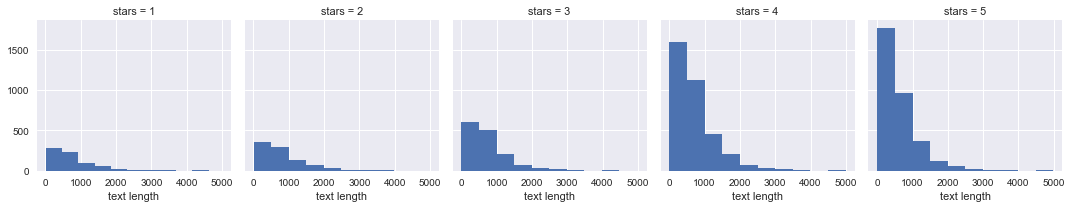

In [4]:
%matplotlib inline
g=sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length')

**Creating a boxplot of text length for each star category.**

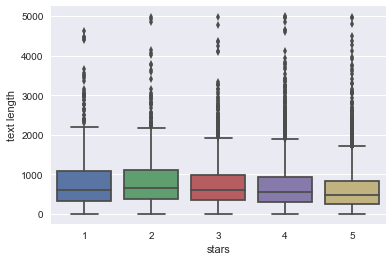

In [5]:
sns.boxplot(x='stars',y='text length',data=yelp)

**Creating a countplot of the number of occurrences for each type of star rating.**

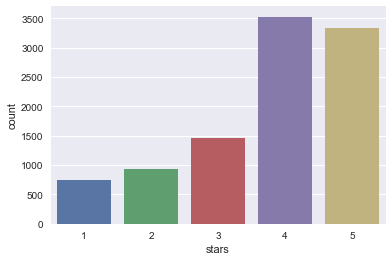

In [6]:
sns.countplot(x='stars',data=yelp)

** Using groupby to get the mean values of the numerical columns**

In [7]:
stars=yelp.groupby('stars').mean()
stars


,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.524700
2,0.719525,1.563107,0.875944,842.265372
3,0.788501,1.306639,0.694730,758.505133
4,0.954623,1.395916,0.670448,712.944129
5,0.944261,1.381780,0.608631,625.015583


**Using the corr() method on that groupby dataframe to produce this dataframe:**

In [11]:
corrmat=stars.corr()
corrmat

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857651
useful,-0.743329,1.000000,0.894506,0.699895
funny,-0.944939,0.894506,1.000000,0.843463
text length,-0.857651,0.699895,0.843463,1.000000


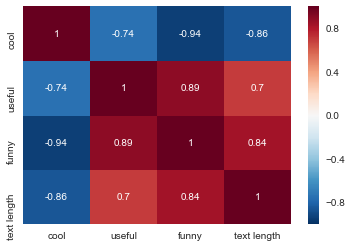

In [13]:
sns.heatmap(corrmat,annot=True)

## NLP Classification Task

In [33]:
yelp_class=yelp[(yelp['stars']==1) | (yelp['stars']==5)]
yelp_class.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


In [34]:
#creating feature vector X
X=yelp_class['text']
#creating target label
y=yelp_class['stars']


**Importing CountVectorizer and creating a CountVectorizer object.**

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [37]:
X=cv.fit_transform( X )

## Train Test Split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

## Training a Model

In [41]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [42]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predictions and Evaluations

In [43]:
predictions = nb.predict(X_test)

** Creating a confusion matrix and classification report using these predictions and y_test **

In [44]:
from sklearn.metrics import confusion_matrix,classification_report

In [45]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]


             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226



**Let's see what happens if we try to include TF-IDF to this process using a pipeline.**

# Using Text Processing

In [46]:
from sklearn.feature_extraction.text import  TfidfTransformer

In [47]:
from sklearn.pipeline import Pipeline

** creating a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [49]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

## Using the Pipeline

### Train Test Split

In [50]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

**fitting the pipeline to the training data**

In [51]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        str...         use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### Predictions and Evaluation

In [52]:
predictions = pipeline.predict(X_test)

In [53]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[  0 228]
 [  0 998]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



C:\Users\wafaa\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
